<a href="https://colab.research.google.com/github/infiniteoverflow/Translate-and-TTS/blob/master/Translate_and_TTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr

In [ ]:
!pip install gTTS

In [ ]:
!pip install googletrans

In [4]:
from googletrans import Translator
import easyocr
from gtts import gTTS
from IPython.display import Audio

In [9]:
reader = easyocr.Reader(['hi'])
translator = Translator()

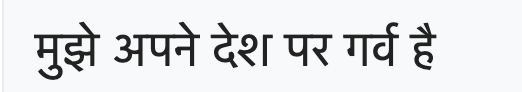

In [17]:
import PIL
from PIL import ImageDraw
im = PIL.Image.open('/content/hindi.png')
im

In [18]:
bounds = reader.readtext(
    '/content/hindi.png',
    add_margin = 0.4,
    width_ths = 0.7,
    link_threshold = 0.8,
    decoder = 'beamsearch',
    blocklist='=-',
    detail=1,
)

bounds

[([[8, 0], [462, 0], [462, 92], [8, 92]],
  'मुझे अपने देश पर गर्व है',
  0.06968721747398376)]

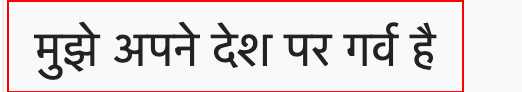

In [19]:
def draw_boxes(image,bounds,color='red',width=2):
  draw = ImageDraw.Draw(image)
  for bound in bounds:
    p0,p1,p2,p3 = bound[0]
    draw.line([*p0,*p1,*p2,*p3,*p0],fill=color,width=width)
  return image

draw_boxes(im,bounds)

In [20]:
## Remove Bounding box details

text_list = reader.readtext(
    '/content/hindi.png',
    add_margin = 0.4,
    width_ths = 0.7,
    link_threshold = 0.8,
    decoder = 'beamsearch',
    blocklist='=-',
    detail=0,
)

text_list

['मुझे अपने देश पर गर्व है']

In [21]:
text_comb = ' '.join(text_list)
text_comb

'मुझे अपने देश पर गर्व है'

In [22]:
print(translator.detect(text_comb))

Detected(lang=hi, confidence=1.0)


In [32]:
text_en = translator.translate(text_comb,src='hi')
print(text_en.text)

I am proud of my country


'en'